In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 5)

In [4]:
data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [5]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [9]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

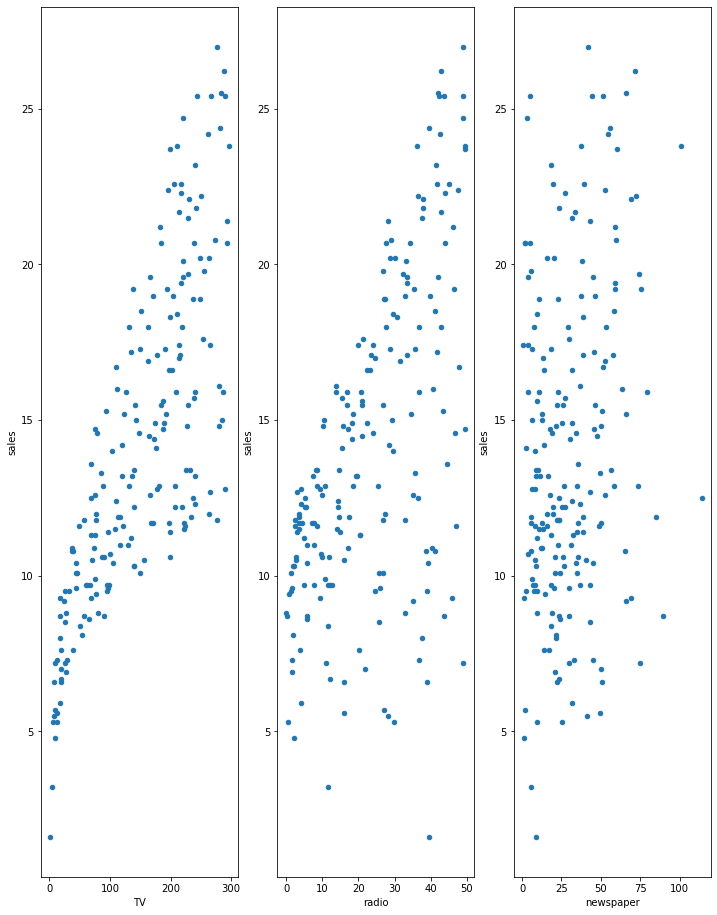

In [10]:
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(12,16))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

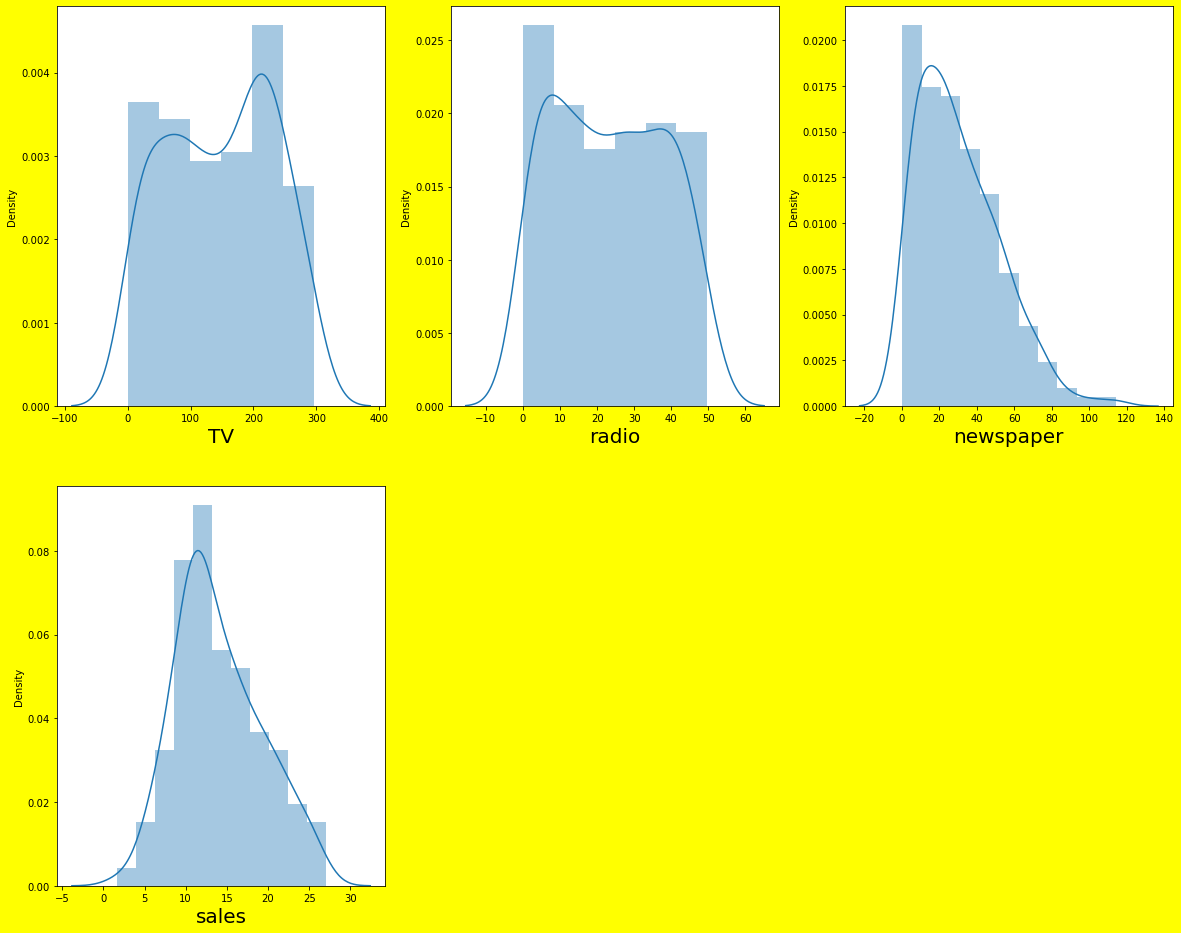

In [12]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [13]:
from scipy.stats import zscore

In [14]:
z_score=zscore(data[['TV','radio','newspaper']])

In [15]:
abs_score=np.abs(z_score)
filtering_entry=(abs_score < 3).all(axis=1)

In [16]:
data=data[filtering_entry]

In [17]:
data.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

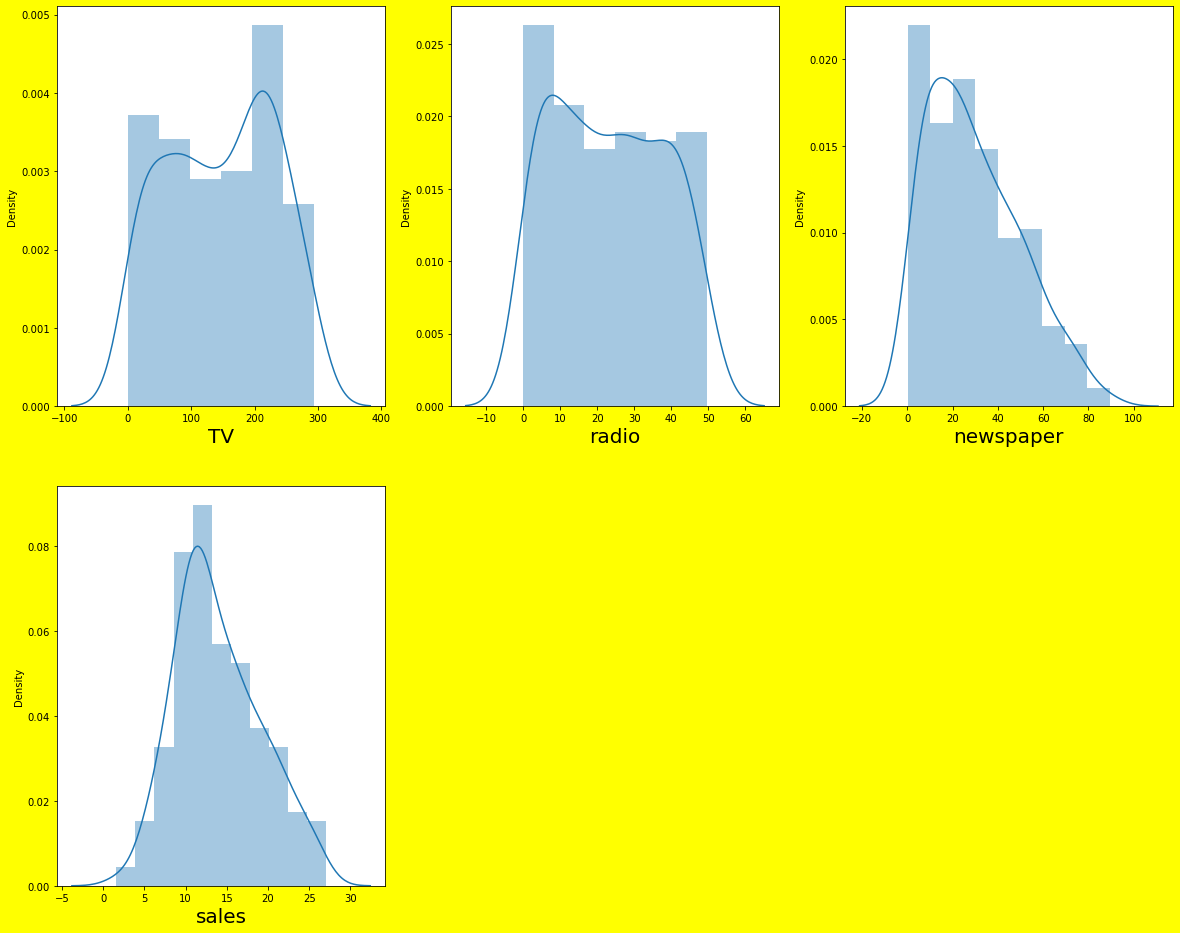

In [18]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [19]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [20]:
corr=data.corr()

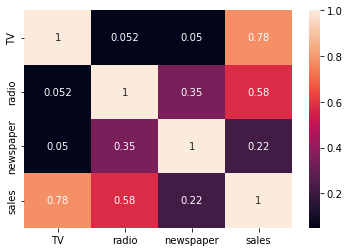

In [21]:
sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.show()

In [22]:
import pickle

In [23]:
data=data.drop_duplicates()

In [24]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

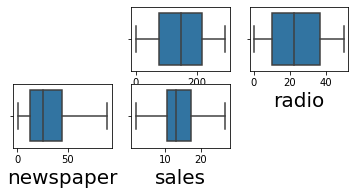

In [25]:
for column in data:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(data[column])
    plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

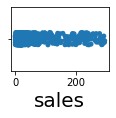

In [26]:
for column in data:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
    sns.stripplot(data[column])
    plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [27]:
X=data.drop(columns=['sales'])
y=data['sales']

In [28]:
scalar=StandardScaler()

In [29]:
X_scaled=scalar.fit_transform(X)

In [30]:
X_scaled.shape

(198, 3)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.7,random_state=40)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
reg= RandomForestRegressor()

In [34]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
y_pred=reg.predict(x_test)

In [36]:
y_pred

array([14.838,  6.594, 14.981, 23.842,  9.857, 14.672, 20.821,  7.264,
        7.529,  6.894, 18.363, 11.497, 12.212, 15.483, 11.293, 19.332,
       12.441, 11.333, 10.851, 10.419, 17.68 , 11.924, 12.693, 11.996,
       20.356,  7.496, 14.967,  9.858, 14.079,  4.683,  9.866, 21.224,
       10.022, 14.539, 17.165, 17.35 , 12.526, 16.005, 19.139, 10.447,
       14.572, 16.81 , 17.829,  9.914, 12.77 ,  3.494, 12.784, 13.767,
        9.432, 15.523, 12.421, 12.855, 10.578, 10.687, 20.926, 17.39 ,
       13.444, 20.011, 23.699, 10.447,  6.915,  6.935, 20.004,  7.185,
       20.617, 22.228, 12.168, 13.887, 19.936, 20.169, 20.646, 10.873,
       11.002, 12.23 , 10.649, 12.464, 13.701, 18.611, 15.997, 19.297,
       11.289,  8.766, 24.489, 12.773, 11.381, 12.712, 12.635, 20.624,
       17.069, 13.945, 12.776, 12.985,  8.013, 12.711, 18.872, 11.751,
       13.43 ,  5.857, 11.171, 15.035, 23.333, 15.008, 16.062, 16.056,
       21.747, 10.753, 15.249, 10.174, 24.214, 10.726, 20.771, 14.112,
      

In [37]:
import sklearn

In [38]:
from sklearn.metrics import r2_score

In [54]:
def metric_score(reg,X_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=reg.predict(X_train)
        print("Test R2 SCORE",r2_score(y_train,y_pred))
    
     
        
        
    elif train==False:
        pred=reg.predict(x_test)
        print("Test R2 SCORE",r2_score(y_test,pred))

In [55]:
metric_score(reg,x_train,x_test,y_train,y_test,train=True)
metric_score(reg,x_train,x_test,y_train,y_test,train=False)

Test R2 SCORE 0.9938748944144393
Test R2 SCORE 0.9600755487907229


In [56]:
from sklearn.ensemble import AdaBoostRegressor

In [57]:
ada=AdaBoostRegressor()

In [58]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [59]:
y_pred=ada.predict(x_train)

In [60]:
y_pred

array([11.95      , 12.92142857, 11.73181818, 11.73181818, 11.22857143,
        2.4       , 17.23      , 14.77058824, 14.16666667, 22.9       ,
       15.725     , 22.96956522, 12.7625    , 17.23      ,  3.2       ,
       13.66428571,  7.475     , 12.0875    , 25.78      , 19.96666667,
       20.34285714, 12.55      , 11.6       , 12.55      , 11.15555556,
       12.55      , 12.26666667, 15.47647059, 23.08571429, 12.0875    ,
       12.12307692, 11.15555556,  7.3       , 15.7       , 12.55      ,
       19.68888889, 15.72857143,  7.9       , 22.96363636, 18.32727273,
       14.55294118,  5.325     , 11.15555556, 24.96666667, 12.0875    ,
       17.20526316, 19.46      ,  6.05      ,  8.1       , 12.26666667,
       19.25      , 12.96666667,  8.14      ,  8.17142857, 11.225     ,
       11.73181818, 12.55      , 12.50666667, 11.83846154])

In [61]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

Test R2 SCORE 0.9801702076385878
Test R2 SCORE 0.917865635803599


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [63]:
lr=LinearRegression()
dt=DecisionTreeRegressor()

In [64]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

Test R2 SCORE 0.8818489861187064
Test R2 SCORE 0.8824581746977485


In [67]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

Test R2 SCORE 1.0
Test R2 SCORE 0.8868673682827198


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
grid_param={'criterion':['squared_error','absolute_error'],'max_depth':[2,5],'min_samples_leaf':[2,10],
            'min_samples_split':[3,10],
            'max_leaf_nodes':[5,10]}

In [70]:
grid_search=GridSearchCV(estimator=reg,param_grid=grid_param,cv=5,n_jobs=-1)

In [71]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 5], 'max_leaf_nodes': [5, 10],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [3, 10]})

In [72]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [73]:
pickle.dump(reg,open('reg_model','wb'))